# Selection of Data

##### For this project I am choosing "Consumer Complaint Data set from kaggle data set"

#####  link = "https://www.kaggle.com/datasets/heemalichaudhari/consumer-complaints"


# Data Collections

### Download and import data from kaglle¶

#### Importing Libreary required for this project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import opendatasets as od
import warnings
warnings.filterwarnings("ignore")
import matplotlib.style

#### Downloading Data From Kaggle

In [ ]:
od.download("https://www.kaggle.com/datasets/heemalichaudhari/consumer-complaints")

In [2]:
RawDf = pd.read_csv('consumer-complaints/Consumer_Complaints.csv')
RawDf.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/21/2017,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company has responded to the consumer and the ...,EXPERIAN DELAWARE GP,TX,77075,Older American,NaN,Phone,03/21/2017,Closed with non-monetary relief,Yes,No,2397100
1,04/19/2017,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not disclosed as an attempt to collect,NaN,NaN,"Security Credit Services, LLC",IL,60643,NaN,NaN,Web,04/20/2017,Closed with explanation,Yes,No,2441777
2,04/19/2017,Credit card,NaN,Other,NaN,NaN,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,62025,NaN,NaN,Referral,04/20/2017,Closed with explanation,Yes,No,2441830
3,04/14/2017,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,Company believes it acted appropriately as aut...,"Shellpoint Partners, LLC",CA,90305,NaN,NaN,Referral,04/14/2017,Closed with explanation,Yes,No,2436165
4,04/19/2017,Credit card,NaN,Credit determination,NaN,NaN,Company has responded to the consumer and the ...,U.S. BANCORP,LA,70571,NaN,NaN,Postal mail,04/21/2017,Closed with explanation,Yes,No,2441726


# Data Preperations

In [3]:
# shape of data
RawDf.shape
# there are 777959 raw and 18 columns

(777959, 18)

In [4]:
RawDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777959 entries, 0 to 777958
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 777959 non-null  object
 1   Product                       777959 non-null  object
 2   Sub-product                   542822 non-null  object
 3   Issue                         777959 non-null  object
 4   Sub-issue                     320986 non-null  object
 5   Consumer complaint narrative  157865 non-null  object
 6   Company public response       197884 non-null  object
 7   Company                       777959 non-null  object
 8   State                         772056 non-null  object
 9   ZIP code                      772001 non-null  object
 10  Tags                          109264 non-null  object
 11  Consumer consent provided?    288311 non-null  object
 12  Submitted via                 777959 non-null  object
 13 

## Handeling Missing Values

### Handeling Columns

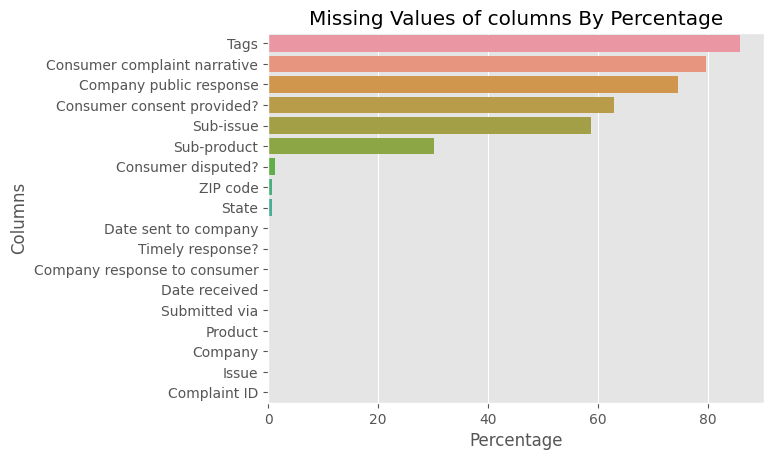

In [5]:
# Percentage of missing values
plt.style.use('ggplot')
bar_plot = RawDf.isnull().sum().sort_values(ascending=False)*100/len(RawDf)
plt.title("Missing Values of columns By Percentage")
plt.xlabel("Percentage")
plt.ylabel("Columns")
sns.barplot(y = bar_plot.keys(), x = bar_plot.values, orient="h")
plt.show()

##### We can see there are some columns which have lots of missing value it will effect our model so we drop that column which have more than 10% of missing value

In [6]:
col_need_to_drop = RawDf.isnull().sum().sort_values(ascending=False
                                )[RawDf.isnull().sum().sort_values(ascending=False)*100/len(RawDf) > 10].keys()
col_need_to_drop

Index(['Tags', 'Consumer complaint narrative', 'Company public response',
       'Consumer consent provided?', 'Sub-issue', 'Sub-product'],
      dtype='object')

#### Droping columns

In [7]:
RawDf1 = RawDf.drop(col_need_to_drop, axis=1)
RawDf1.isnull().sum().sort_values(ascending=False)*100/len(RawDf1)

Consumer disputed?              1.226928
ZIP code                        0.765850
State                           0.758780
Date received                   0.000000
Product                         0.000000
Issue                           0.000000
Company                         0.000000
Submitted via                   0.000000
Date sent to company            0.000000
Company response to consumer    0.000000
Timely response?                0.000000
Complaint ID                    0.000000
dtype: float64

##### We can see columns are droped and there only 3 columns which have less than 2 percent of missing value we can drop the raws of missing value that will not effect our data quality

### Handeling Raws

In [8]:
RawDf3 = RawDf1.dropna()
RawDf3.isnull().sum()

Date received                   0
Product                         0
Issue                           0
Company                         0
State                           0
ZIP code                        0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Complaint ID                    0
dtype: int64

##### Now we can see that there is no missing value in our data sets

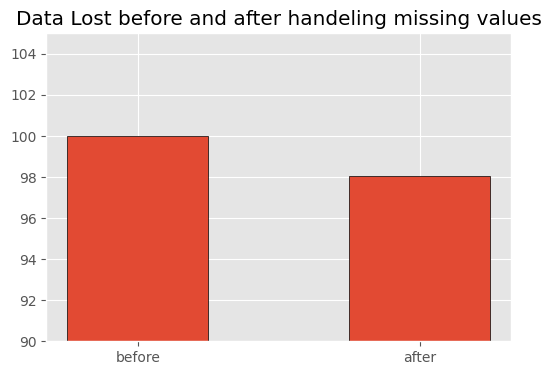

lost data after missing value handeling is 1.9570440087459622 % only


In [9]:
x = [0,0.2]
x_data = np.array(x)
y = [100,len(RawDf3)*100/len(RawDf)]
y_data = np.array(y)
plt.style.use('ggplot')
plt.figure(figsize=(6,4))
plt.title("Data Lost before and after handeling missing values")
plt.ylim(90,105)
plt.bar(x_data, y_data , width=0.1,edgecolor= 'k')
plt.xticks(x_data, ["before", "after"])
plt.show()
print("lost data after missing value handeling is" ,(len(RawDf)-len(RawDf3))*100/len(RawDf), "% only")

## Columns type formating

In [10]:
RawDf3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762734 entries, 0 to 777958
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 762734 non-null  object
 1   Product                       762734 non-null  object
 2   Issue                         762734 non-null  object
 3   Company                       762734 non-null  object
 4   State                         762734 non-null  object
 5   ZIP code                      762734 non-null  object
 6   Submitted via                 762734 non-null  object
 7   Date sent to company          762734 non-null  object
 8   Company response to consumer  762734 non-null  object
 9   Timely response?              762734 non-null  object
 10  Consumer disputed?            762734 non-null  object
 11  Complaint ID                  762734 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 75.6+ MB


##### The column "Date received" and "Date sent to company" type should be DateTime and Column "Zip Code" type should be int64

In [11]:
RawDf3['Date received'] = pd.to_datetime(RawDf3['Date received'], format="%m/%d/%Y")
RawDf3['Date sent to company'] = pd.to_datetime(RawDf3['Date sent to company'], format="%m/%d/%Y")

In [12]:
RawDf3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762734 entries, 0 to 777958
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date received                 762734 non-null  datetime64[ns]
 1   Product                       762734 non-null  object        
 2   Issue                         762734 non-null  object        
 3   Company                       762734 non-null  object        
 4   State                         762734 non-null  object        
 5   ZIP code                      762734 non-null  object        
 6   Submitted via                 762734 non-null  object        
 7   Date sent to company          762734 non-null  datetime64[ns]
 8   Company response to consumer  762734 non-null  object        
 9   Timely response?              762734 non-null  object        
 10  Consumer disputed?            762734 non-null  object        
 11  Complaint ID 

#### Now we can see the "Date received" , "Date sent to company" converted into datetime64

In [13]:
Final_df = RawDf3

# Data Analysis and vizualizations

## A high level overview to colmns

In [14]:
Final_df.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2017-03-21,Credit reporting,Incorrect information on credit report,EXPERIAN DELAWARE GP,TX,77075,Phone,2017-03-21,Closed with non-monetary relief,Yes,No,2397100
1,2017-04-19,Debt collection,Disclosure verification of debt,"Security Credit Services, LLC",IL,60643,Web,2017-04-20,Closed with explanation,Yes,No,2441777
2,2017-04-19,Credit card,Other,"CITIBANK, N.A.",IL,62025,Referral,2017-04-20,Closed with explanation,Yes,No,2441830
3,2017-04-14,Mortgage,"Loan modification,collection,foreclosure","Shellpoint Partners, LLC",CA,90305,Referral,2017-04-14,Closed with explanation,Yes,No,2436165
4,2017-04-19,Credit card,Credit determination,U.S. BANCORP,LA,70571,Postal mail,2017-04-21,Closed with explanation,Yes,No,2441726


In [15]:
Final_df['Date received'].value_counts()
# We can use histogram for this column

2017-01-19    2058
2017-01-20    1629
2017-01-24    1121
2017-01-26    1021
2017-01-23     965
              ... 
2012-01-01      14
2011-12-24      11
2011-12-25      10
2017-04-22       9
2014-03-09       5
Name: Date received, Length: 1970, dtype: int64

In [16]:
Final_df['Issue'].value_counts()

Loan modification,collection,foreclosure    111492
Incorrect information on credit report      102352
Loan servicing, payments, escrow account     76881
Cont'd attempts collect debt not owed        60393
Account opening, closing, or management      37169
                                             ...  
Lender damaged or destroyed vehicle              7
Lender sold the property                         7
Struggling to pay mortgage                       5
Lender damaged or destroyed property             3
Trouble during payment process                   2
Name: Issue, Length: 97, dtype: int64

In [18]:
Final_df['Company'].value_counts()[Final_df['Company'].value_counts()*100/len(Final_df) > 3]

BANK OF AMERICA, NATIONAL ASSOCIATION     65315
WELLS FARGO BANK, NATIONAL ASSOCIATION    53104
EQUIFAX, INC.                             48210
EXPERIAN DELAWARE GP                      45474
JPMORGAN CHASE & CO.                      42156
TRANSUNION INTERMEDIATE HOLDINGS, INC.    39862
CITIBANK, N.A.                            34396
OCWEN LOAN SERVICING LLC                  23963
Name: Company, dtype: int64

In [19]:
Final_df['State'].value_counts()

CA    110646
FL     73587
TX     59397
NY     52528
GA     36249
       ...  
MP        31
MH        30
AS        25
AA        13
PW        12
Name: State, Length: 62, dtype: int64

In [20]:
Final_df['Submitted via'].value_counts()

Web            521647
Referral       131220
Phone           50925
Postal mail     48068
Fax             10573
Email             301
Name: Submitted via, dtype: int64

In [21]:
Final_df['Company response to consumer'].value_counts()

Closed with explanation            571363
Closed with non-monetary relief     94602
Closed with monetary relief         50779
Closed without relief               17781
Closed                              17430
Closed with relief                   5264
Untimely response                    3592
In progress                          1923
Name: Company response to consumer, dtype: int64

In [22]:
Final_df['Timely response?'].value_counts()

Yes    741202
No      21532
Name: Timely response?, dtype: int64

In [23]:
Final_df['Consumer disputed?'].value_counts()

No     615322
Yes    147412
Name: Consumer disputed?, dtype: int64

In [24]:
Company_responce_time = Final_df['Date sent to company']-Final_df['Date received']
Company_responce_time.value_counts()

0 days      367984
1 days       84952
2 days       58189
3 days       45720
4 days       43349
             ...  
437 days         1
575 days         1
464 days         1
326 days         1
348 days         1
Length: 446, dtype: int64

## Complaints Date

### Trends of  complaints recieved by time frame

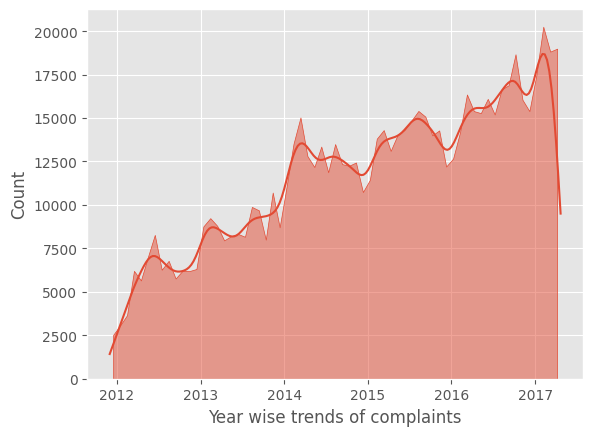

In [25]:
plt.style.use('ggplot')
sns.histplot(Final_df['Date received'], kde=True, bins=65,element= 'poly')
plt.xlabel("Year wise trends of complaints")
plt.show()

#### Conclutions :- Year by Year complaints was increased

### Complaints response

In [26]:
Responce_day = Final_df['Date sent to company']-Final_df['Date received']
responce_day = Responce_day.value_counts()/len(Responce_day)*100
print(responce_day[:20])
print("Within 20 days " , str(responce_day[:20].sum())[:4], "% of complained solved")

0 days     48.245391
1 days     11.137828
2 days      7.629003
3 days      5.994226
4 days      5.683371
5 days      5.071231
6 days      3.661958
7 days      2.286774
8 days      0.946070
-1 days     0.923389
9 days      0.535180
10 days     0.465955
13 days     0.394764
14 days     0.391486
11 days     0.389651
12 days     0.373525
15 days     0.354121
20 days     0.295123
21 days     0.272834
19 days     0.259592
dtype: float64
Within 20 days  95.3 % of complained solved


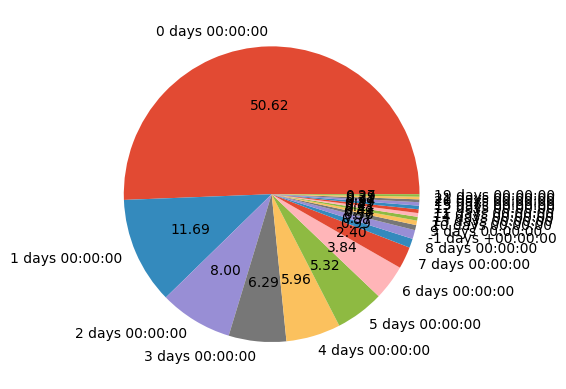

In [27]:
x_plot = responce_day[:20].keys()
y_plot = responce_day[:20].values
plt.pie(y_plot, labels=x_plot, autopct='%.2f')
plt.show()

##### Conclutions:- 50% of  Complaint has been sent to company On the same day 11th percent of complaint has been sent to company after one days 8% of complaint sends to company after 2 days

### 2) Which product have more complain?

In [28]:
Product_groupby_series =  Final_df.Product.value_counts()
Product_groupby_series 

Mortgage                   225394
Debt collection            145071
Credit reporting           139929
Credit card                 88471
Bank account or service     84643
Student loan                32315
Consumer Loan               31411
Payday loan                  5523
Money transfers              5155
Prepaid card                 3774
Other financial service      1031
Virtual currency               17
Name: Product, dtype: int64

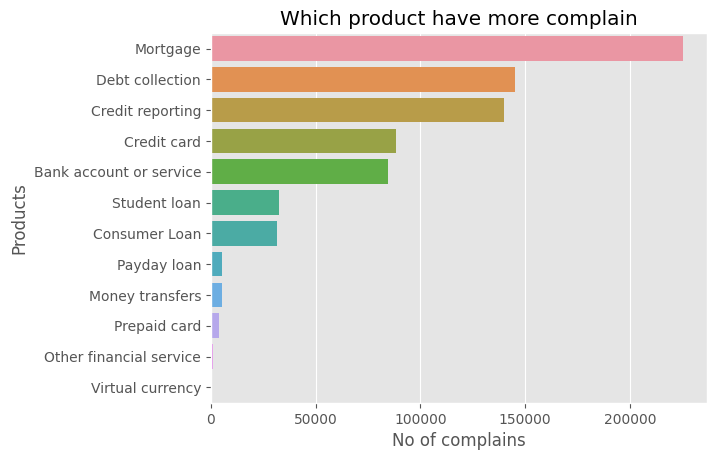

In [522]:
plt.style.use('ggplot')
plt.title("Which product have more complain")
plt.xlabel("No of complains")
plt.ylabel("Products")
sns.barplot(y = Product_groupby_series.keys(), x = Product_groupby_series.values)
plt.show()

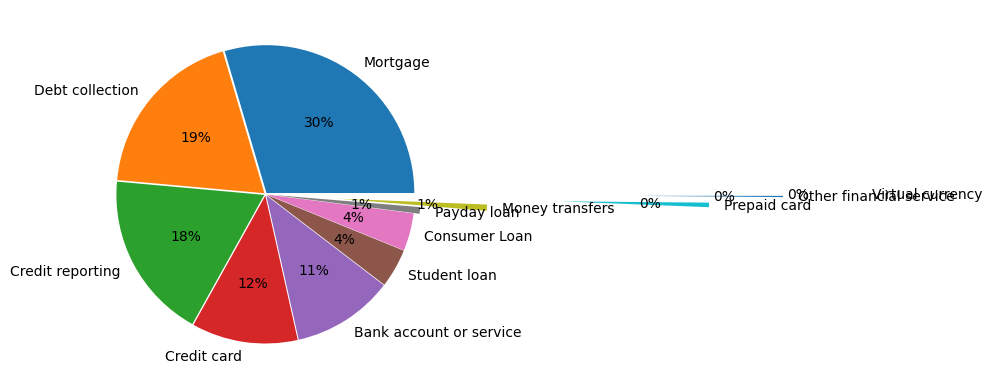

In [137]:
plt.pie(Product_groupby_series.values,labels=Product_groupby_series.keys(),
       explode = [0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.05,0.5,2,2.5,3], autopct='%.0f%%')
plt.show()

#####  CONCLUTIONS :- mortgage coffer 30% of complaints tab collections cover 19% of complaint credit reporting covers 18% of complaint anti credit card covers only 12 persons of complaint and also we can conclude that consumer loan content 4 persons of complaint HO final conclusion will be consumer loan and pay day loan , prepaid card have low customer complaint

#### Analysis if mortgage

In [220]:
mortgage_df = Final_df[Final_df['Product'] == 'Mortgage']
mortgage_issue = mortgage_df['Issue'].value_counts()

<AxesSubplot: >

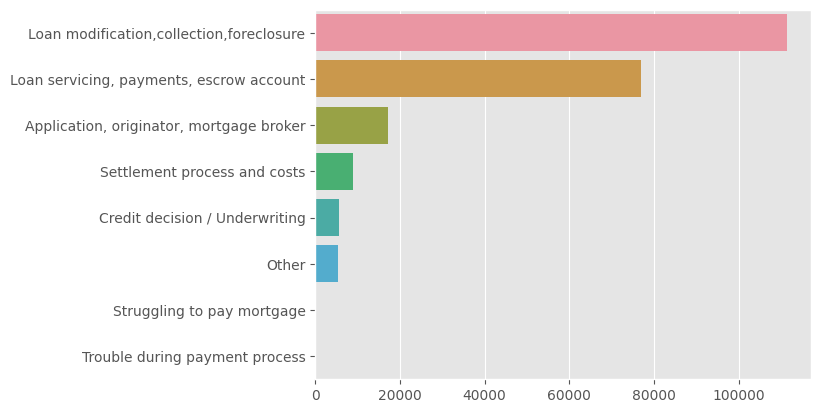

In [523]:
plt.style.use('ggplot')
sns.barplot(mortgage_issue.values, mortgage_issue.keys(), orient='h')

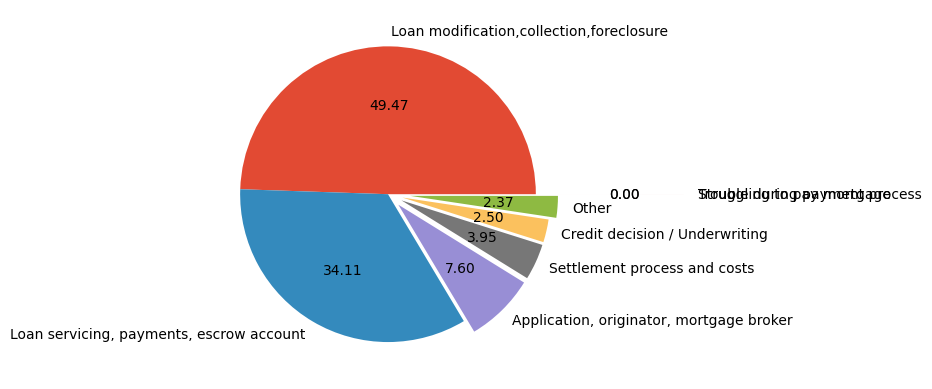

In [537]:
plt.pie(mortgage_issue.values, labels=mortgage_issue.keys(), autopct='%.2f', 
        explode= [0.000001,0.0001,0.1,0.1,0.1,0.15,1,1])
plt.show()

##### conlusion:- By checking the pie chart we can conclude that product mortgage have most of the complaints for loan modifications collections for closure and loan servicing payments escrow account It should be look after what is the problem with that upper mension category

### which product have highest consumer disputed?

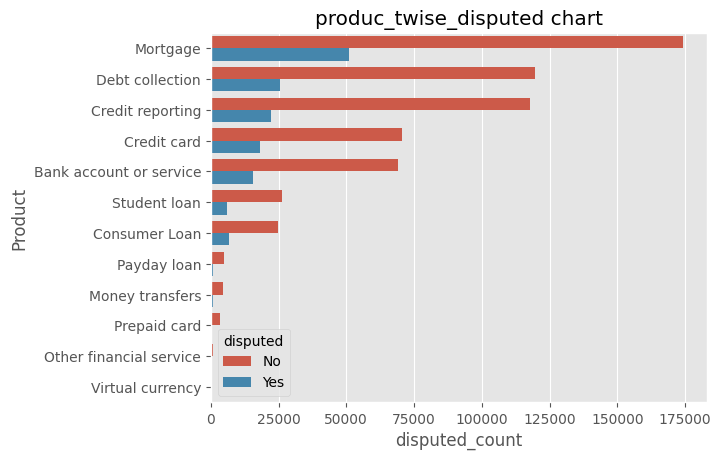

In [801]:
disputed_count = Final_df[['Product','Consumer disputed?']].value_counts().values
df_series = Final_df[['Product','Consumer disputed?']].value_counts().keys()
Produtc = []
disputed = []
for i in range(len(df_series)):
    l = df_series[i]
    Produtc.append(l[0])
    disputed.append(l[1])
disputed_plot_df = pd.DataFrame(data={'Product':Produtc,'disputed':disputed,
                                      'disputed_count':disputed_count})
plt.title("produc_twise_disputed chart")
sns.barplot(data=dispured_plot_df, y = 'Product', x = 'disputed_count', hue =
            'disputed', orient='h')
plt.show()

##### Conclutions:-  only less than 25 percent of complain in every product is disputed  Cause may be customer giving falls complans or company dont want to give claims

## Company Analysis

#### Top 20 company which recived highest complain

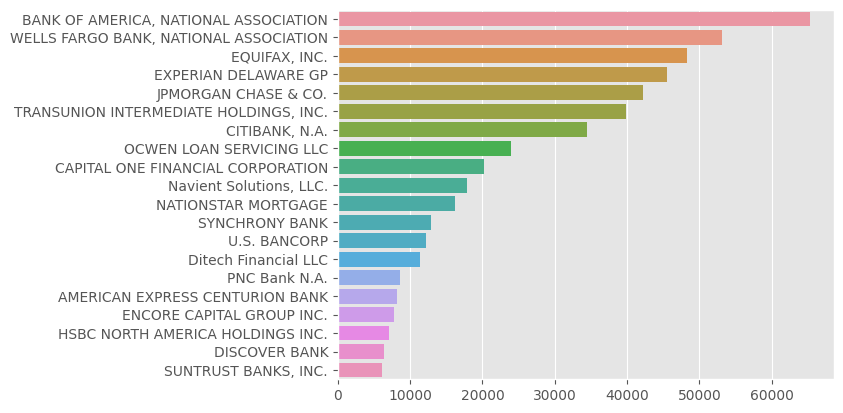

In [524]:
plt.style.use('ggplot')
Top_20_company = Final_df['Company'].value_counts()[:20]
sns.barplot(Top_20_company.values, Top_20_company.keys(), orient='h')
plt.show()

In [115]:
Top_20_company.keys()

Index(['BANK OF AMERICA, NATIONAL ASSOCIATION',
       'WELLS FARGO BANK, NATIONAL ASSOCIATION', 'EQUIFAX, INC.',
       'EXPERIAN DELAWARE GP', 'JPMORGAN CHASE & CO.',
       'TRANSUNION INTERMEDIATE HOLDINGS, INC.', 'CITIBANK, N.A.',
       'OCWEN LOAN SERVICING LLC', 'CAPITAL ONE FINANCIAL CORPORATION',
       'Navient Solutions, LLC.', 'NATIONSTAR MORTGAGE', 'SYNCHRONY BANK',
       'U.S. BANCORP', 'Ditech Financial LLC', 'PNC Bank N.A.',
       'AMERICAN EXPRESS CENTURION BANK', 'ENCORE CAPITAL GROUP INC.',
       'HSBC NORTH AMERICA HOLDINGS INC.', 'DISCOVER BANK',
       'SUNTRUST BANKS, INC.'],
      dtype='object')

#### Top 20 company which is more customer friendly 'BANK OF AMERICA, NATIONAL ASSOCIATION',
       'WELLS FARGO BANK, NATIONAL ASSOCIATION', 'EQUIFAX, INC.',
       'EXPERIAN DELAWARE GP', 'JPMORGAN CHASE & CO.',
       'TRANSUNION INTERMEDIATE HOLDINGS, INC.', 'CITIBANK, N.A.',
       'OCWEN LOAN SERVICING LLC', 'CAPITAL ONE FINANCIAL CORPORATION',
       'Navient Solutions, LLC.', 'NATIONSTAR MORTGAGE', 'SYNCHRONY BANK',
       'U.S. BANCORP', 'Ditech Financial LLC', 'PNC Bank N.A.',
       'AMERICAN EXPRESS CENTURION BANK', 'ENCORE CAPITAL GROUP INC.',
       'HSBC NORTH AMERICA HOLDINGS INC.', 'DISCOVER BANK',
       'SUNTRUST BANKS, INC.'

In [453]:
#This code will make 20 different data_frame of top 10 companies

# making a list of top 20 company
top_20_company_names = Final_df['Company'].value_counts().keys()[:20]

# grouping company by groupby operations
group_df_name = []
for i in range(len(top_20_company_names)):
    group_df_name.append('top_'+ str(i+1))
company_group_by = Final_df.groupby(by=Final_df['Company'])

# making separet data frame for each company
for i in range(len(top_20_company_names)):
    group_df_name[i] = company_group_by.get_group(top_20_company_names[i])
    
# only taken 'Company','Timely response?' column for our analysis
for i in range(len(group_df_name)):
    group_df_name[i] = group_df_name[i][['Company','Timely response?']]
    
#making data frame for plotting
company = []
yes = []
no = []
for i in range(len(group_df_name)):
    company.append(group_df_name[i].value_counts().keys()[1][0])
    yes.append(group_df_name[i].value_counts().values[0])
    no.append(group_df_name[i].value_counts().values[1])
com = np.array([company]).reshape(20,1)
y = np.array([yes]).reshape(20,1)
n = np.array([no]).reshape(20,1)
plot_data = pd.DataFrame(data=com, columns=["Company"])
plot_data["yes"] = y
plot_data["no"] = n
plot_data['percentage_of timely_responce'] = plot_data["yes"]*100/(plot_data["yes"] + plot_data["no"])
plot_data

,Company,yes,no,percentage_of timely_responce
0,"BANK OF AMERICA, NATIONAL ASSOCIATION",63763,1552,97.623823
1,"WELLS FARGO BANK, NATIONAL ASSOCIATION",50510,2594,95.115246
2,"EQUIFAX, INC.",48209,1,99.997926
3,EXPERIAN DELAWARE GP,45467,7,99.984607
4,JPMORGAN CHASE & CO.,42070,86,99.795996
5,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",39854,8,99.979931
6,"CITIBANK, N.A.",34057,339,99.014420
7,OCWEN LOAN SERVICING LLC,23428,535,97.767391
8,CAPITAL ONE FINANCIAL CORPORATION,20080,65,99.677339
9,"Navient Solutions, LLC.",17874,1,99.994406


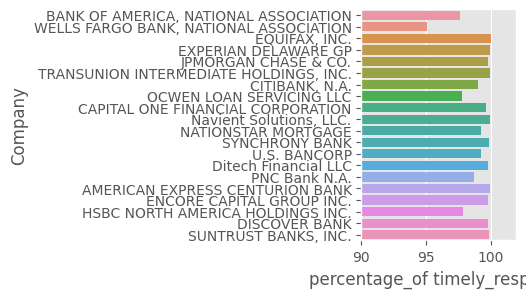

In [807]:
plt.style.use('ggplot')
plt.figure(figsize=(2,3))
plt.xlim(90,102)
sns.barplot(data=plot_data, x='percentage_of timely_responce', y='Company',orient='h')
plt.show()

## State wise analysis

### From which state most of the complains are coming

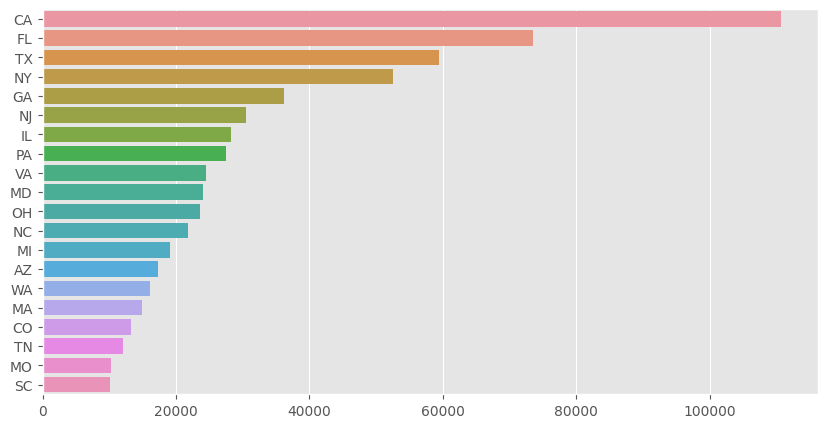

In [526]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
sns.barplot(x=Final_df['State'].value_counts().values[:20], y=Final_df['State'].value_counts().keys()[:20])
plt.show()

In [133]:
print("More than",Final_df['State'].value_counts().values[:20].sum()*100/len(Final_df))

print("of the complain coming from these states ", Final_df['State'].value_counts().keys()[:20])

More than 82.0132575707914
of the complain coming from these states  Index(['CA', 'FL', 'TX', 'NY', 'GA', 'NJ', 'IL', 'PA', 'VA', 'MD', 'OH', 'NC',
       'MI', 'AZ', 'WA', 'MA', 'CO', 'TN', 'MO', 'SC'],
      dtype='object')


#### conclusion :-  That means more tahn 82% of the product sells in those states 
'CA', 'FL', 'TX', 'NY', 'GA', 'NJ', 'IL', 'PA', 'VA', 'MD', 'OH', 'NC',
       'MI', 'AZ', 'WA', 'MA', 'CO', 'TN', 'MO', 'SC'

### Top complained Company states wise

In [488]:
states_list = Final_df['State'].value_counts().keys()
company_state_wise = []
for i in range(len(states_list)):
    company_state_wise.append(Final_df.groupby(by=Final_df['State']).get_group(states_list[i]
                                                                              )['Company'].value_counts().keys()[0])

In [513]:
top_company_state_df = pd.DataFrame({'States':states_list})
top_company_state_df['Company'] = np.array(company_state_wise) 
top_company_state_df

,States,Company
0,CA,"BANK OF AMERICA, NATIONAL ASSOCIATION"
1,FL,"BANK OF AMERICA, NATIONAL ASSOCIATION"
2,TX,EXPERIAN DELAWARE GP
3,NY,JPMORGAN CHASE & CO.
4,GA,"BANK OF AMERICA, NATIONAL ASSOCIATION"
...,...,...
57,MP,"BANK OF AMERICA, NATIONAL ASSOCIATION"
58,MH,"CITIBANK, N.A."
59,AS,BANK OF HAWAII CORPORATION
60,AA,"WELLS FARGO BANK, NATIONAL ASSOCIATION"


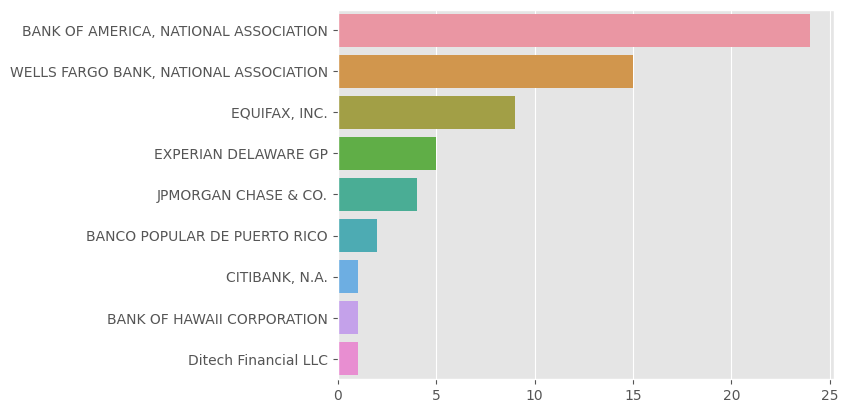

In [528]:
plt.style.use('ggplot')
sns.barplot(x=top_company_state_df['Company'].value_counts().values
           , y=top_company_state_df['Company'].value_counts().keys(), orient='h')
plt.show()

### Conclusion:- Bank of america has top in 24 states and wells and fargo has top in 15 states

## Complains submited mode

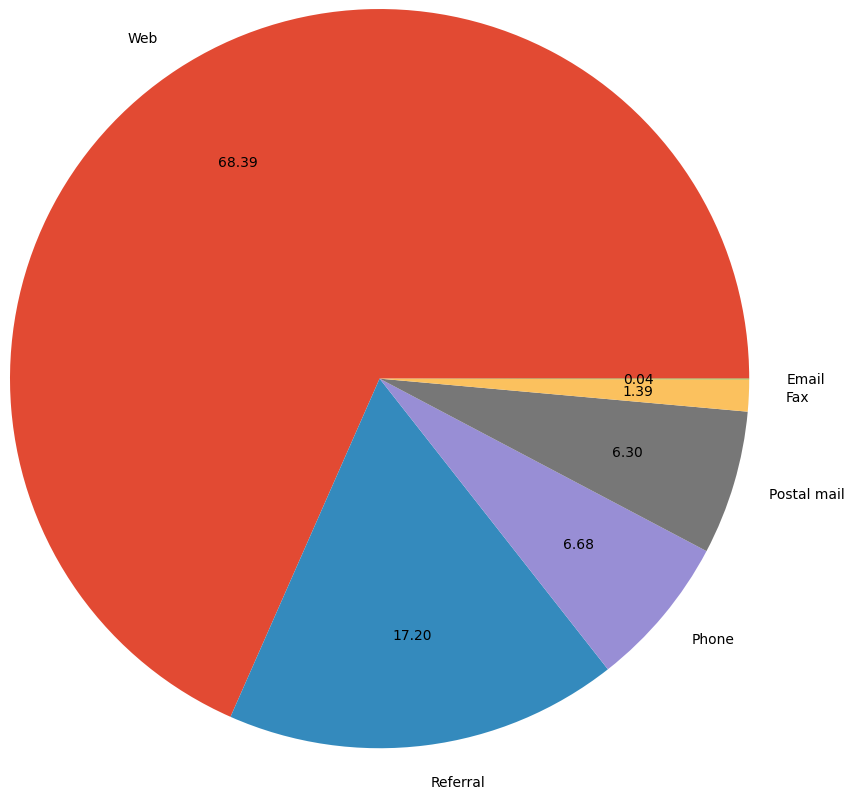

In [549]:
plt.pie(Final_df['Submitted via'].value_counts().values, labels= 
        Final_df['Submitted via'].value_counts().keys() , autopct='%.2f',pctdistance=0.7, radius=2.5)
plt.show()

#### Conclusion :- complains submitted through web 68.39% , complains submitted through referral 17.20% complains submitted through phone 6.68%, complain trough email is very less

### Company wise submitted mode

[]

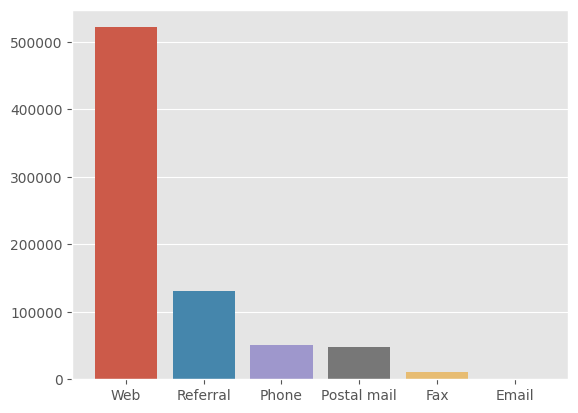

In [76]:
x = Final_df['Submitted via'].value_counts().keys()
y = Final_df['Submitted via'].value_counts().values
sns.barplot(x,y)
plt.plot()

### conclutions:- Most practices way for complaint is via WEB and Email is the not accepted way for complians

### Which way submitted data is timely responced?

In [645]:
submited_medium = Final_df['Submitted via'].value_counts().keys()
disputed_complains= Final_df.groupby(by= Final_df['Submitted via']).get_group('Web'
                                                                             )['Timely response?'].value_counts().values[0]
non_disputed_complains = Final_df.groupby(by= Final_df['Submitted via']
                                         ).get_group(submited_medium[0])['Timely response?'].value_counts().values[1]
total = disputed_complains + non_disputed_complains
pct_complain_disputed = disputed_complains*100/total
pct_complain_disputed

96.92435689268797

In [653]:
submited_medium = Final_df['Submitted via'].value_counts().keys()
pct_complain_disputed = []
for i in range(len(submited_medium)):
    disputed_complains= Final_df.groupby(by= Final_df['Submitted via']).get_group(submited_medium[i])['Timely response?'].value_counts().values[0]
    non_disputed_complains = Final_df.groupby(by= Final_df['Submitted via']).get_group(submited_medium[i])['Timely response?'].value_counts().values[1]
    total = disputed_complains + non_disputed_complains
    pct = disputed_complains*100/total
    pct_complain_disputed.append(pct)

In [666]:
plot_data_frame = pd.DataFrame([np.array(submited_medium), np.array(pct_complain_disputed)]).T
plot_data_frame.rename(columns = {0:'medium'}, inplace = True)
plot_data_frame.rename(columns = {1:'pct_timely_responce'}, inplace = True)

(90.0, 101.0)

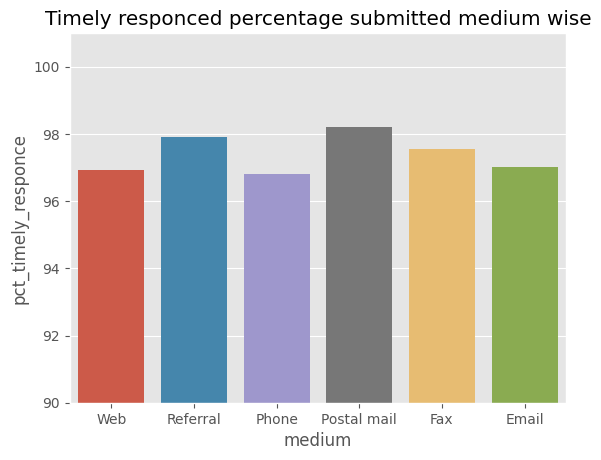

In [671]:
plt.title("Timely responced percentage submitted medium wise")
sns.barplot(data=plot_data_frame, x='medium', y = 'pct_timely_responce')
plt.ylim(90,101)

##### Complain submitted by postal mail is the highest timely responced but other  mode also got more than 96% timly responced

### Product which have monitory relief

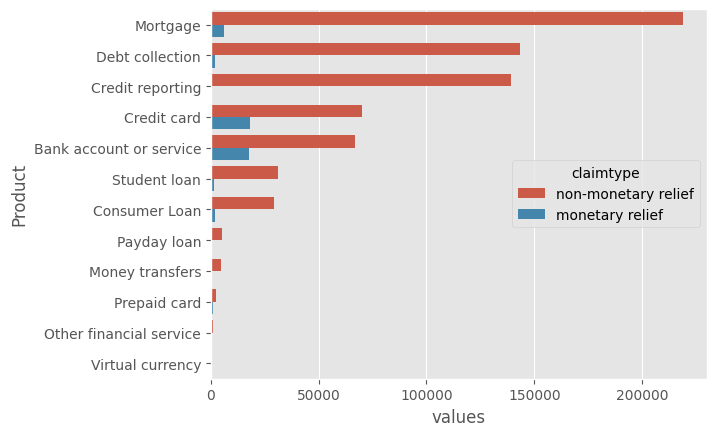

In [72]:
product_and_benifit = Final_df[['Product','Company response to consumer']]
monetory_benifit=product_and_benifit[product_and_benifit['Company response to consumer'] == 'Closed with monetary relief']
product_and_benifit['Company response to consumer'] = np.where(
    product_and_benifit['Company response to consumer'] == 'Closed with monetary relief','monetary relief',
    'non-monetary relief')

values = product_and_benifit.value_counts().values
product = []
claim_type = []
for i in range(len(product_and_benifit.value_counts())):
    product.append(product_and_benifit.value_counts().keys()[i][0])
    claim_type.append(product_and_benifit.value_counts().keys()[i][1])
    
plot_df_moni = pd.DataFrame({'Product':product,'claimtype':claim_type,'values':values})

sns.barplot(data=plot_df_moni, x = 'values', y = 'Product', hue = 'claimtype')
plt.show()

##### Conclusions : -  we can conclude from the above graph than credit card and bank account service have high no of monetory benifit compare to others

#### which complain way is the got transfered faster to company?

In [111]:
Final_df['time_taken_to_transfer_complains_to_company'] = Final_df['Date sent to company']- Final_df['Date received']
required_df = Final_df[['Submitted via','time_taken_to_transfer_complains_to_company']]
required_df.value_counts()[:10]

Submitted via  time_taken_to_transfer_complains_to_company
Web            0 days                                         337467
               1 days                                          39251
               2 days                                          26834
Referral       1 days                                          25092
Web            3 days                                          22224
               4 days                                          19511
Referral       2 days                                          18123
Web            5 days                                          16230
Referral       4 days                                          14995
               5 days                                          14026
dtype: int64

##### Conclutions :-  We can conclude that most of the fastest way to complain is 'Web', 'Referral'

# Ask Questions and Give answers

##### 1) Is there any delay between date of complain recived and complain send to company?
##### 2) Which product have more complain?
##### 3) Why mortage have high no of comolains
##### 4) which company have more complain?
##### 5) which company's which product have more complians?
##### 6) From which states more complains is recived?
##### 7) From which medium complanes are mostly recived?
##### 8) Which company is more customer oriented by giving  timely responce?
##### 9) Which company mostly give consumer disputed
##### 10) Trend of complains by time frame

# Conclutions

1) Year by Year complaints was increased

2) 50% of  Complaint has been sent to company On the same day 
	11th percent of complaint has been sent to company after 
	one days 8% of complaint sends to company after 2 days

3) mortgage coffer 30% of complaints tab collections cover 19% 
	of complaint credit reporting covers 18% of complaint anti 
	credit card covers only 12 persons of complaint and also we can 
	conclude that consumer loan content 4 persons of complaint HO final
	 conclusion will be consumer loan and pay day loan , prepaid card have
	 low customer complaint

4)  product mortgage have most of the complaints for loan modifications
	 collections for closure and loan servicing payments escrow account 
	It should be look after what is the problem with that upper mension 
	category

5) only less than 25 percent of complain in every product is disputed 
	Cause may be customer giving falls complans or company dont want
	to give claims

6) These are the top company which is more customer friendly
	'BANK OF AMERICA, NATIONAL ASSOCIATION',
       'WELLS FARGO BANK, NATIONAL ASSOCIATION', 'EQUIFAX, INC.',
       'EXPERIAN DELAWARE GP', 'JPMORGAN CHASE & CO.',
       'TRANSUNION INTERMEDIATE HOLDINGS, INC.', 'CITIBANK, N.A.',
       'OCWEN LOAN SERVICING LLC', 'CAPITAL ONE FINANCIAL CORPORATION',
       'Navient Solutions, LLC.', 'NATIONSTAR MORTGAGE', 'SYNCHRONY BANK',
       'U.S. BANCORP', 'Ditech Financial LLC', 'PNC Bank N.A.',
       'AMERICAN EXPRESS CENTURION BANK', 'ENCORE CAPITAL GROUP INC.',
       'HSBC NORTH AMERICA HOLDINGS INC.', 'DISCOVER BANK',
       'SUNTRUST BANKS, INC.'

7) more than 82% of the complains are coming from these 20 states 
 	 'CA', 'FL', 'TX', 'NY', 'GA', 'NJ', 'IL', 'PA', 'VA', 'MD', 'OH',
	 'NC','MI', 'AZ', 'WA', 'MA', 'CO', 'TN', 'MO', 'SC'

8)  Bank of america has top in 24 states and wells and fargo has top in 15
	 states

9) complains submitted through web 68.39% , complains submitted through
	 referral 17.20% complains submitted through phone 6.68%, complain
	 trough email is very less  Most practices way for complaint is 
	 via WEB and Email is the not accepted way for complians

10) Complain submitted by postal mail is the highest timely responced
	 but other  mode also got more than 96% timly responced

11) credit card and bank account service have high no of monetory
	 benifit compare to others

12) We can conclude that most of the fastest way to complain is 'Web',
	 'Referral'

# Publish NoteBook